## Alex's Project


## Pt 1
 - unpack the data and establish what we're working with
 - develop a plan for creating the baseline model
 - prepare data for baseline model
 - create baseline model
 - test baseline model
 

### Unpack the data and establish what we're working with

In [134]:
#Data analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#ignore pairplot and graph warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder

In [135]:
!ls data

column_names.md           kc_house_data.csv         kc_house_data_cleaned.csv


In [136]:
#Read cleaned housing data into Pandas data frame
df = pd.read_csv("data/kc_house_data_cleaned.csv")

In [137]:
#investigate first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False,0


In [138]:
#creating age column based on yr_built and yr_renovated
#how to treat houses that were never renovated?
df['age_at_sale'] = (df['date'].str[-4:].astype(int) - df['yr_built']).astype(int)

df['age_renovation_at_sale'] = (df['date'].str[-4:].astype(int) - df['yr_renovated']).astype(int)

In [139]:
age_columns = ['date', 'yr_built', 'age_at_sale', 'age_renovation_at_sale']
df[age_columns].head(20)

,date,yr_built,age_at_sale,age_renovation_at_sale
0,10/13/2014,1955,59,59
1,12/9/2014,1951,63,23
2,2/25/2015,1933,82,82
3,12/9/2014,1965,49,49
4,2/18/2015,1987,28,28
5,5/12/2014,2001,13,13
6,6/27/2014,1995,19,19
7,1/15/2015,1963,52,52
8,4/15/2015,1960,55,55
9,3/12/2015,2003,12,12


In [140]:
#Look at column data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21597 non-null  int64  
 1   date                    21597 non-null  object 
 2   price                   21597 non-null  float64
 3   bedrooms                21597 non-null  int64  
 4   bathrooms               21597 non-null  float64
 5   sqft_living             21597 non-null  int64  
 6   sqft_lot                21597 non-null  int64  
 7   floors                  21597 non-null  float64
 8   waterfront              21597 non-null  object 
 9   view                    21597 non-null  object 
 10  condition               21597 non-null  object 
 11  grade                   21597 non-null  object 
 12  sqft_above              21597 non-null  int64  
 13  sqft_basement           21597 non-null  object 
 14  yr_built                21597 non-null

In [141]:
#count non-unqiue entries in the ID column
#represents homes that appear multiple times in our data
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [142]:
#Finding list of duplicate ID values
df_dupes = df
df_dupes["dup_id"] = df_dupes['id'].duplicated()
df_dupes[df_dupes["dup_id"]==True]['id']

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20165    7853400250
20597    2724049222
20654    8564860270
20764    6300000226
21565    7853420110
Name: id, Length: 177, dtype: int64

In [143]:
duplicate_id_values = list(df_dupes[df_dupes["dup_id"]==True]['id'].values)

In [144]:
#Ivestigating a few duplicate values
df[df['id']==duplicate_id_values[2]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,age_at_sale,age_renovation_at_sale,dup_id
324,7520000520,9/5/2014,232000.0,2,1.0,1240,12092,1.0,NO,NONE,...,98146,47.4957,-122.352,1820,7460,True,280,92,30,False
325,7520000520,3/11/2015,240500.0,2,1.0,1240,12092,1.0,NO,NONE,...,98146,47.4957,-122.352,1820,7460,True,280,93,31,True


In [145]:
df[df['id']==duplicate_id_values[5]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,age_at_sale,age_renovation_at_sale,dup_id
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,NO,NONE,...,98125,47.7142,-122.286,1120,8242,True,0,77,24,False
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,98125,47.7142,-122.286,1120,8242,True,0,78,25,True


Concluding that house ids appear multiple times because homes can be sold multiple times

In [146]:
#looking at measures of central tendancy in the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,291.725008,43.323286,41.377830
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950,442.667800,29.377285,28.950873
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,-1.000000,-1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,18.000000,16.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,40.000000,37.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,560.000000,63.000000,61.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000,115.000000,115.000000


### Develop a plan for creating the baseline model

#### Investigate correlations of numeric columns and price
Numeric columns offer the simplest starting point for linear regression. Investigating correlation of these columns.

In [147]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'was_renovated',
       'sqft_basement2', 'age_at_sale', 'age_renovation_at_sale', 'dup_id'],
      dtype='object')

In [148]:
#Investigate correlations of valid numeric columns and price
valid_numeric_columns_df = df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above", "sqft_living15", "sqft_lot15", "sqft_basement2", "age_at_sale", 'age_renovation_at_sale']]
valid_numeric_columns_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement2',
       'age_at_sale', 'age_renovation_at_sale'],
      dtype='object')

In [149]:
abs(valid_numeric_columns_df.corrwith(valid_numeric_columns_df['price'])).sort_values(ascending=False)

price                     1.000000
sqft_living               0.701917
sqft_above                0.605368
sqft_living15             0.585241
bathrooms                 0.525906
sqft_basement2            0.323799
bedrooms                  0.315954
age_renovation_at_sale    0.097462
sqft_lot                  0.089876
sqft_lot15                0.082845
age_at_sale               0.053890
dtype: float64

In [150]:
((abs(valid_numeric_columns_df.corr())) >= .70)[:1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
price,True,False,False,True,False,False,False,False,False,False,False


 `'sqft_living'` is a candidate for further investigation based on the absolute value of its correlations with `'price'` being above 0.70



#### Validate assumptions for simple regression 
Validate that our candidates for dependant and independant variables `'sqft_living'` and  `'price'` pass assumptions for linear regression analysis.

  ##### Before running model 
 - Linearity
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

#### Validate linearity
The relatioinship between `'sqft_living'` and  `'price'` passes our visual linearity test. There appear to be some outliers to investigate in future models that could improve the results.

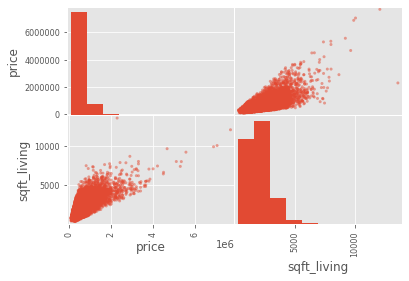

In [151]:
pd.plotting.scatter_matrix(df[['price','sqft_living']]);
plt.show()

#### Run simple regression model on `'sqft_living'` and  `'price'`

In [152]:
from statsmodels.formula.api import ols
simple_model = ols('price ~ sqft_living',df).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:25   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

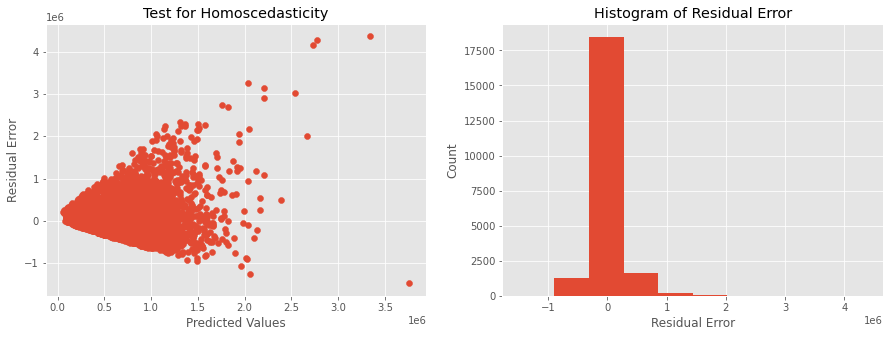

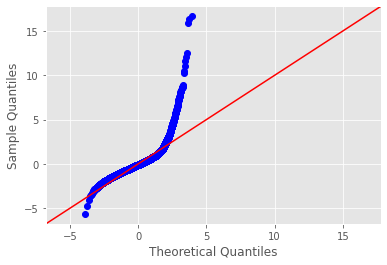

In [153]:
import scipy.stats as stats
resid = simple_model.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=simple_model.fittedvalues,y=resid)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

### Analysis of simple regression model

In [154]:
print(f'R-squared {round(simple_model.rsquared,2)}')
print(f'P-Value {simple_model.f_pvalue}')
print(f'Price standard error {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef {round(simple_model.params[1])}')

R-squared 0.49
P-Value 0.0
Price standard error 4410.0
sqft_living coef 281.0


We're confident that we've described a statistically significant relationship between`'sqft_living'` and  `'price'` but our model is pretty biased and doesn't do a very good job predicting home price.

Our tests of validity indicated that there is heteroscedasticity and our errors have a significant rightward skew. Our predictions seem to break down at higher `'sqft_living'` suggesting that we have some outliers to deal with to improve our model.

## Pt 2
 - Improvements to simple model

#### Validate assumptions for improvements to simple regression

 ##### Before running model 
 - Linearity
 - Outliers
 - Normality of variables (not-required) 
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

#### Validate outliers


Looking at `'sqft_living'` because there's seems to be a lack of linearity between `'sqft_living'` and  `'price'` when `'sqft_living'` is very high

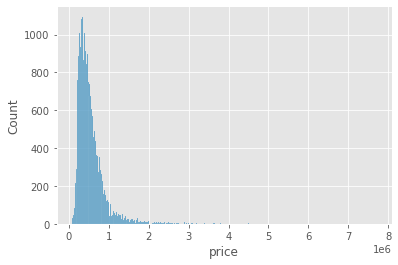

In [155]:
sns.histplot(df['price'], bins='auto');

In [156]:
df['price'].describe().apply("${:,.2f}".format)

count       $21,597.00
mean       $540,296.57
std        $367,368.14
min         $78,000.00
25%        $322,000.00
50%        $450,000.00
75%        $645,000.00
max      $7,700,000.00
Name: price, dtype: object

In [157]:
#Find our IQR
price_iqr = df['price'].quantile(.75)-df['price'].quantile(.25)
#Find our Q3
price_Q3 = df['price'].quantile(.75)
#Multiply IQR by 1.5 to establish outlier cutoff
price_upper_cutoff = (price_iqr *1.5) + price_Q3
print(f' Price IQR: {price_iqr}')
print(f' Price upper outlier cutoff: {price_upper_cutoff}')

 Price IQR: 323000.0
 Price upper outlier cutoff: 1129500.0


In [158]:
#Create a new df with sqft_living lower & upper outliers removed
df_outliers_removed = df[(df['price'] <= price_upper_cutoff)]
print(f'We removed {len(df["price"])-len(df_outliers_removed["price"])} outliers from price')

We removed 1158 outliers from price


In [159]:
df_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20439 non-null  int64  
 1   date                    20439 non-null  object 
 2   price                   20439 non-null  float64
 3   bedrooms                20439 non-null  int64  
 4   bathrooms               20439 non-null  float64
 5   sqft_living             20439 non-null  int64  
 6   sqft_lot                20439 non-null  int64  
 7   floors                  20439 non-null  float64
 8   waterfront              20439 non-null  object 
 9   view                    20439 non-null  object 
 10  condition               20439 non-null  object 
 11  grade                   20439 non-null  object 
 12  sqft_above              20439 non-null  int64  
 13  sqft_basement           20439 non-null  object 
 14  yr_built                20439 non-null

In [160]:
#setting df to remove outliers
df = df_outliers_removed

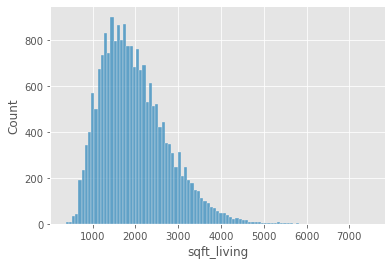

In [161]:
sns.histplot(df['sqft_living']);

In [162]:
df['sqft_living'].describe()

count    20439.000000
mean      1975.189931
std        773.797924
min        370.000000
25%       1400.000000
50%       1860.000000
75%       2430.000000
max       7480.000000
Name: sqft_living, dtype: float64

### Model 2: Remove upper outliers in `'sqft_living'`

`'sqft_living'` is normally distributed but there is a right-skew giving us some outliers.
The rule for a high outlier is that if any data point in a dataset is more than Q3 - 1.5xIQR, it's a high outlier. We will subset our data to only look at data that falls under 1.5xIQR

In [163]:
df['sqft_living'].describe()

count    20439.000000
mean      1975.189931
std        773.797924
min        370.000000
25%       1400.000000
50%       1860.000000
75%       2430.000000
max       7480.000000
Name: sqft_living, dtype: float64

In [164]:
#Find our IQR
sqft_living_iqr = df['sqft_living'].quantile(.75)-df['sqft_living'].quantile(.25)
#Find our Q3
sqft_living_Q3 = df['sqft_living'].quantile(.75)
#Multiply IQR by 1.5 to establish outlier cutoff
sqft_living_upperoutlier_cutoff = (sqft_living_iqr *1.5) + sqft_living_Q3
print(f' sqft_living_iqr IQR: {sqft_living_iqr}')
print(f' sqft_living_iqr upper outlier cutoff: {sqft_living_upperoutlier_cutoff}')

 sqft_living_iqr IQR: 1030.0
 sqft_living_iqr upper outlier cutoff: 3975.0


In [165]:
#Create a new df with sqft_living upper outliers removed
df_outliers_removed = df[df['sqft_living'] <= sqft_living_upperoutlier_cutoff]
print(f'We removed {len(df["sqft_living"])-len(df_outliers_removed["sqft_living"])} outliers from sqft_living')

We removed 319 outliers from sqft_living


In [166]:
refined_model_1 = ols('price ~ sqft_living',df).fit()
refined_model_1_summary = refined_model_1.summary()
refined_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.285e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:26   Log-Likelihood:            -2.7428e+05
No. Observations:               20439   AIC:                         5.486e+05
Df Residuals:                   20437   BIC:                         5.486e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.471e+05   3122.142     47.125      0.000    1.41e+05    1.53e+05
sqft_living   166.8563      1.472    113.371      0.000     163.971     169.741
==============================================================================
Omnibus:                      917.003   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1043.823
Skew:                           0.543   Prob(JB):                    2.17e-227
Kurtosis:                       3.215   Cond. No.                     5.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 2: Analysis
- We failed to improve our model
- Next, we will try to remove lower outliers in `'sqft_living'`

In [167]:
print(f'Simple R-squared {round(simple_model.rsquared,2)}')
print(f'Simple P-Value {simple_model.f_pvalue}')
print(f'Simple Price standard error {round(simple_model.bse,0)[0]}')
print(f'Simple sqft_living coef {round(simple_model.params[1])}')

print(f'refined_model_1 R-squared {round(refined_model_1.rsquared,2)}')
print(f'refined_model_1 P-Value {refined_model_1.f_pvalue}')
print(f'refined_model_1 Price standard error {round(refined_model_1.bse,0)[0]}')
print(f'refined_model_1 sqft_living coef {round(refined_model_1.params[1])}')


Simple R-squared 0.49
Simple P-Value 0.0
Simple Price standard error 4410.0
Simple sqft_living coef 281.0
refined_model_1 R-squared 0.39
refined_model_1 P-Value 0.0
refined_model_1 Price standard error 3122.0
refined_model_1 sqft_living coef 167.0


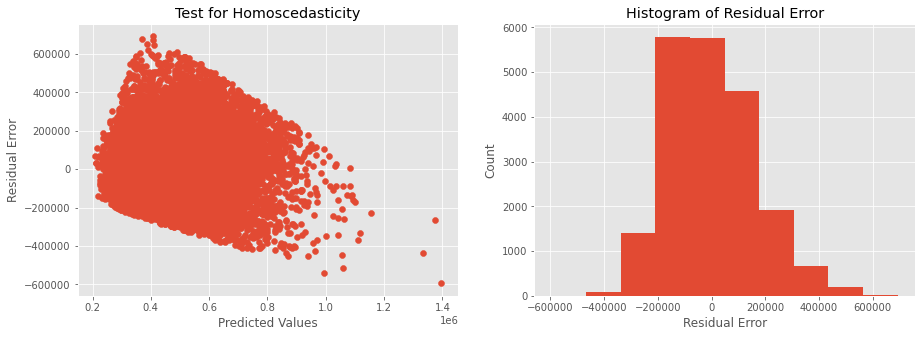

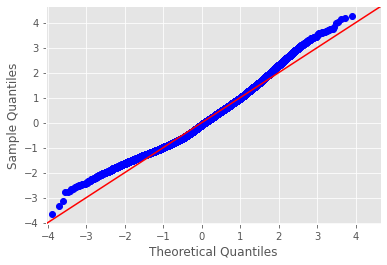

In [168]:
resid_refined_model_1 = refined_model_1.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=refined_model_1.fittedvalues,y=resid_refined_model_1)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid_refined_model_1)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid_refined_model_1, dist=stats.norm, line='45', fit=True)

In [169]:
#write a function to create these test plots
def testplots(model):
    resid = model.resid
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    #ax[0] test for homoscedasticity
    ax[0].scatter(model.fittedvalues,y=resid)
    ax[0].set_xlabel("Predicted Values")
    ax[0].set_ylabel("Residual Error")
    ax[0].set_title(label="Test for Homoscedasticity")
    #ax[1] histogram of residuals
    ax[1].hist(resid)
    ax[1].set_xlabel("Residual Error")
    ax[1].set_ylabel("Count")
    ax[1].set_title(label="Histogram of Residual Error")
    plt.style.use('ggplot')
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    return (fig, ax)


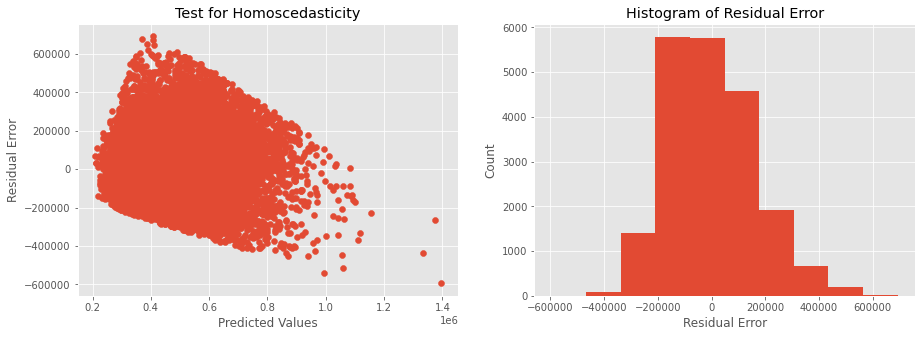

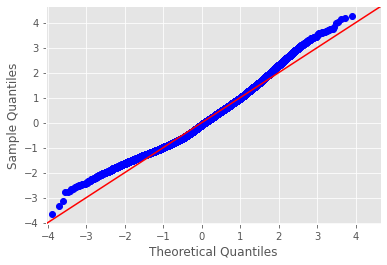

In [170]:
testplots(refined_model_1);

### Model 3: Remove lower outliers in `'sqft_living'`

In [171]:
#Find our IQR
sqft_living_iqr = df['sqft_living'].quantile(.75)-df['sqft_living'].quantile(.25)
#Find our Q3
sqft_living_Q3 = df['sqft_living'].quantile(.75)
#Multiply IQR by 1.5 to establish outlier cutoff
sqft_living_upperoutlier_cutoff = (sqft_living_iqr *1.5) + sqft_living_Q3
#Remove lower outliers beneath 750 sqft_living
sqft_living_loweroutlier_cutoff = 750
print(f' sqft_living_iqr IQR: {sqft_living_iqr}')
print(f' sqft_living_iqr upper outlier cutoff: {sqft_living_upperoutlier_cutoff}')
print(f' sqft_living_iqr lower outlier cutoff: {sqft_living_loweroutlier_cutoff}')

 sqft_living_iqr IQR: 1030.0
 sqft_living_iqr upper outlier cutoff: 3975.0
 sqft_living_iqr lower outlier cutoff: 750


In [172]:
#Create a new df with sqft_living lower & upper outliers removed
df_outliers_removed = df[(df['sqft_living'] <= sqft_living_upperoutlier_cutoff) & (df['sqft_living'] >= sqft_living_loweroutlier_cutoff)]
print(f'We removed {len(df["sqft_living"])-len(df_outliers_removed["sqft_living"])} outliers from sqft_living')

We removed 599 outliers from sqft_living


In [173]:
#Re-run our new model
refined_model_2 = ols('price ~ sqft_living',df_outliers_removed).fit()
refined_model_2_summary = refined_model_2.summary()
refined_model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:27   Log-Likelihood:            -2.6626e+05
No. Observations:               19840   AIC:                         5.325e+05
Df Residuals:                   19838   BIC:                         5.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.389e+05   3427.795     40.521      0.000    1.32e+05    1.46e+05
sqft_living   171.3427      1.651    103.776      0.000     168.106     174.579
==============================================================================
Omnibus:                      934.846   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1070.609
Skew:                           0.560   Prob(JB):                    3.31e-233
Kurtosis:                       3.199   Cond. No.                     6.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 3: Analysis
- We failed to improve our model
- Next, we will try to add additional variables

In [174]:
print(f'Simple R-squared {round(simple_model.rsquared,2)}')
print(f'Simple P-Value {simple_model.f_pvalue}')
print(f'Simple Price standard error {round(simple_model.bse,0)[0]}')
print(f'Simple sqft_living coef {round(simple_model.params[1])}')

print(f'refined_model_1 R-squared {round(refined_model_1.rsquared,2)}')
print(f'refined_model_1 P-Value {refined_model_1.f_pvalue}')
print(f'refined_model_1 Price standard error {round(refined_model_1.bse,0)[0]}')
print(f'refined_model_1 sqft_living coef {round(refined_model_1.params[1])}')

print(f'refined_model_2 R-squared {round(refined_model_2.rsquared,2)}')
print(f'refined_model_2 P-Value {refined_model_2.f_pvalue}')
print(f'refined_model_2 Price standard error {round(refined_model_2.bse,0)[0]}')
print(f'refined_model_2 sqft_living coef {round(refined_model_2.params[1])}')

Simple R-squared 0.49
Simple P-Value 0.0
Simple Price standard error 4410.0
Simple sqft_living coef 281.0
refined_model_1 R-squared 0.39
refined_model_1 P-Value 0.0
refined_model_1 Price standard error 3122.0
refined_model_1 sqft_living coef 167.0
refined_model_2 R-squared 0.35
refined_model_2 P-Value 0.0
refined_model_2 Price standard error 3428.0
refined_model_2 sqft_living coef 171.0


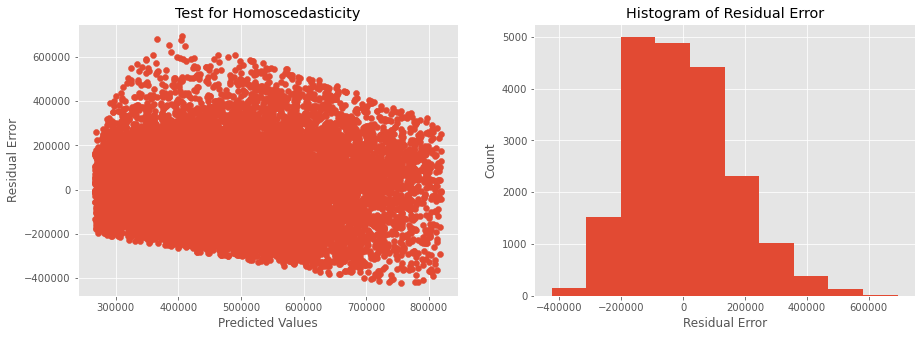

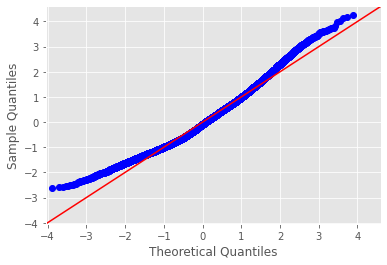

In [175]:
resid_refined_model_2 = refined_model_2.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=refined_model_2.fittedvalues,y=resid_refined_model_2)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid_refined_model_2)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid_refined_model_2, dist=stats.norm, line='45', fit=True)

### Model 4: Multi-variable linear regressions 1


In [176]:
#Create a list of our numeric columns
df_numeric = valid_numeric_columns_df
df_numeric.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
0,221900.0,3,1.00,1180,5650,1180,1340,5650,0,59,59
1,538000.0,3,2.25,2570,7242,2170,1690,7639,400,63,23
2,180000.0,2,1.00,770,10000,770,2720,8062,0,82,82
3,604000.0,4,3.00,1960,5000,1050,1360,5000,910,49,49
4,510000.0,3,2.00,1680,8080,1680,1800,7503,0,28,28


In [177]:
#Test up train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Subset to numeric columns
numeric_columns = list(df_numeric.columns.drop(['price']))
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]
#Fit model
lr = LinearRegression()
lr.fit(X_train_numeric,y_train)

LinearRegression()

In [178]:
X

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,age_at_sale,age_renovation_at_sale,dup_id
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,NO,NONE,Average,...,98178,47.5112,-122.257,1340,5650,False,0,59,59,False
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,NO,NONE,Average,...,98125,47.7210,-122.319,1690,7639,True,400,63,23,False
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,NO,NONE,Average,...,98028,47.7379,-122.233,2720,8062,False,0,82,82,False
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,98136,47.5208,-122.393,1360,5000,False,910,49,49,False
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,NO,NONE,Average,...,98074,47.6168,-122.045,1800,7503,False,0,28,28,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,NO,NONE,Average,...,98103,47.6993,-122.346,1530,1509,False,0,5,5,False
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,NO,NONE,Average,...,98146,47.5107,-122.362,1830,7200,False,0,1,1,False
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,NO,NONE,Average,...,98144,47.5944,-122.299,1020,2007,False,0,5,5,False
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,NO,NONE,Average,...,98027,47.5345,-122.069,1410,1287,False,0,11,11,False


In [179]:
X_train_numeric

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
2874,4,1.75,2620,11041,2620,2230,11041,0,52,52
16348,4,2.75,3260,5335,3260,3180,5438,0,12,12
10003,4,2.25,1890,8034,1890,1920,7210,0,47,47
5635,3,2.50,1250,1103,1250,1250,1188,0,9,9
10910,3,1.00,1060,7900,1060,1310,7900,0,54,14
...,...,...,...,...,...,...,...,...,...,...
11890,4,3.50,3420,33106,3420,3420,36590,0,10,10
12607,3,2.00,1430,6000,1430,1630,6315,0,69,69
5679,3,1.50,1120,7000,1120,1470,7950,0,59,59
903,3,2.00,1480,6698,1080,1850,7348,400,36,36


In [180]:
#DummyRegressor scores for train and test sets
dummy_lr = DummyRegressor()
dummy_lr.fit(X_train, y_train)
print(dummy_lr.score(X_train, y_train))

print(dummy_lr.score(X_test, y_test))

0.0
-1.4294705344752856e-05


In [181]:
#Run multi-variable model using numeric columns
endog = df_numeric['price']
exog = sm.add_constant(df_numeric.drop(columns=['price']))

multi_model_1 = sm.OLS(endog, exog).fit()
multi_model_1_summary = multi_model_1.summary()
multi_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     3151.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:27   Log-Likelihood:            -2.9833e+05
No. Observations:               21597   AIC:                         5.967e+05
Df Residuals:                   21587   BIC:                         5.968e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.383e+05   9543.604    -24.975      0.000   -2.57e+05    -2.2e+05
bedrooms               -7.392e+04   2317.025    -31.905      0.000   -7.85e+04   -6.94e+04
bathrooms               8.477e+04   3744.722     22.638      0.000    7.74e+04    9.21e+04
sqft_living              168.5738      2.539     66.395      0.000     163.597     173.550
sqft_lot                  -0.0108      0.057     -0.188      0.851      -0.123       0.101
sqft_above                94.3894      2.307     40.911      0.000      89.867      98.912
sqft_living15             87.2479      3.793     23.004      0.000      79.814      94.682
sqft_lot15                -0.7805      0.087     -8.930      0.000      -0.952      -0.609
sqft_basement2            74.1844      2.793     26.556      0.000      68.709      79.660
age_at_sale             4004.9899    150.246     26.656      0.000    3710.497    4299.483
age_renovation_at_sale  -708.8551    154.117     -4.599      0.000   -1010.935    -406.775
==============================================================================
Omnibus:                    14924.263   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           621603.984
Skew:                           2.810   Prob(JB):                         0.00
Kurtosis:                      28.674   Cond. No.                     7.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [182]:
#Try scaling coeficients
#Import standard scaler
from sklearn.preprocessing import StandardScaler

#Scale our exogenous variables
ss = StandardScaler()
ss.fit(df_numeric.drop(columns=['price']))
X_scaled = ss.transform(df_numeric.drop(columns=['price']))

#Create dataframe with columns titles
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = list(df_numeric.drop(columns=['price']).columns)

In [183]:
X_scaled_df

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
0,-0.411261,-1.451073,-0.980652,-0.228182,-0.735251,-0.943676,-0.260627,-0.659031,0.533646,0.608706
1,-0.411261,0.174486,0.533369,-0.189739,0.460776,-0.432887,-0.187700,0.244602,0.669809,-0.634808
2,-1.517363,-1.451073,-1.427234,-0.123139,-1.230575,1.070292,-0.172190,-0.659031,1.316582,1.403174
3,0.694841,1.149821,-0.131057,-0.243878,-0.892305,-0.914488,-0.284459,1.396734,0.193239,0.263286
4,-0.411261,-0.150626,-0.436040,-0.169503,-0.131197,-0.272353,-0.192686,-0.659031,-0.521615,-0.462098
...,...,...,...,...,...,...,...,...,...,...
21592,-0.411261,0.499597,-0.599424,-0.337306,-0.312413,-0.666390,-0.412457,-0.659031,-1.304551,-1.256566
21593,0.694841,0.499597,0.250171,-0.224246,0.629911,-0.228571,-0.203796,-0.659031,-1.440714,-1.394734
21594,-1.517363,-1.776184,-1.154928,-0.332018,-0.928548,-1.410683,-0.394198,-0.659031,-1.304551,-1.256566
21595,-0.411261,0.499597,-0.523178,-0.306952,-0.227845,-0.841518,-0.420597,-0.659031,-1.100307,-1.049313


In [184]:
df_numeric

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement2,age_at_sale,age_renovation_at_sale
0,221900.0,3,1.00,1180,5650,1180,1340,5650,0,59,59
1,538000.0,3,2.25,2570,7242,2170,1690,7639,400,63,23
2,180000.0,2,1.00,770,10000,770,2720,8062,0,82,82
3,604000.0,4,3.00,1960,5000,1050,1360,5000,910,49,49
4,510000.0,3,2.00,1680,8080,1680,1800,7503,0,28,28
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,1530,1530,1509,0,5,5
21593,400000.0,4,2.50,2310,5813,2310,1830,7200,0,1,1
21594,402101.0,2,0.75,1020,1350,1020,1020,2007,0,5,5
21595,400000.0,3,2.50,1600,2388,1600,1410,1287,0,11,11


In [185]:
#Run multi-variable model
endog = df_numeric['price']
exog = sm.add_constant(X_scaled_df)

multi_model_scaled = sm.OLS(endog, exog).fit()
multi_model_scaled = multi_model_scaled.summary()
multi_model_scaled

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     3147.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:27   Log-Likelihood:            -2.9834e+05
No. Observations:               21597   AIC:                         5.967e+05
Df Residuals:                   21587   BIC:                         5.968e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.403e+05   1644.426    328.562      0.000    5.37e+05    5.44e+05
bedrooms               -6.812e+04   2943.694    -23.140      0.000   -7.39e+04   -6.23e+04
bathrooms               6.621e+04   3320.168     19.942      0.000    5.97e+04    7.27e+04
sqft_living             2.325e+17   3.75e+17      0.620      0.535   -5.02e+17    9.67e+17
sqft_lot                -430.0564   2372.490     -0.181      0.856   -5080.313    4220.200
sqft_above             -2.096e+17   3.38e+17     -0.620      0.535   -8.72e+17    4.53e+17
sqft_living15           5.972e+04   2602.058     22.950      0.000    5.46e+04    6.48e+04
sqft_lot15             -2.128e+04   2384.768     -8.923      0.000    -2.6e+04   -1.66e+04
sqft_basement2         -1.121e+17   1.81e+17     -0.620      0.535   -4.66e+17    2.42e+17
age_at_sale             1.177e+05   4416.723     26.654      0.000    1.09e+05    1.26e+05
age_renovation_at_sale -2.058e+04   4464.372     -4.610      0.000   -2.93e+04   -1.18e+04
==============================================================================
Omnibus:                    14336.857   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           555318.630
Skew:                           2.666   Prob(JB):                         0.00
Kurtosis:                      27.263   Cond. No.                     6.75e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Model 4: Analysis
- We improved upon our simple model
- Our new model's variance is low
- sqft_lot is not statistically significant
- Next, we to remove co-linear variables

In [186]:
#Print results compared to our simple model
print(f'Simple R2 {round(simple_model.rsquared,2)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),2)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),2)}')

Simple R2 0.49
multi_model_1 Train R2 0.48
multi_model_1 Test R2 0.47


### Model 4: Multi-variable linear regressions 2

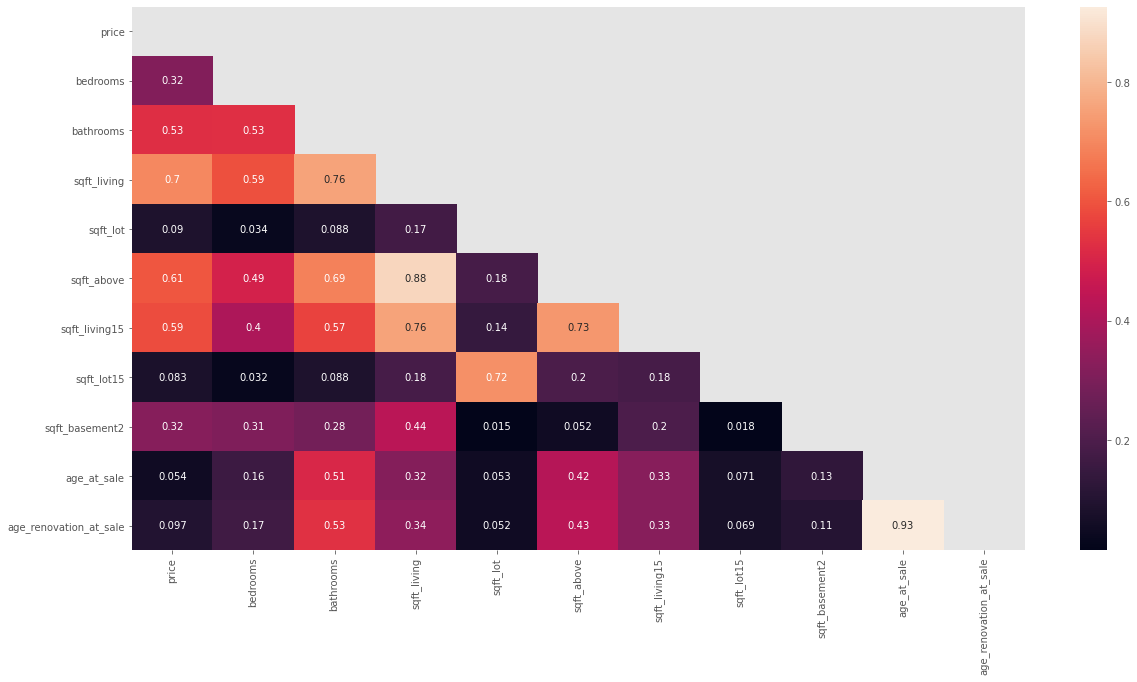

In [187]:
#Explore the co-linearity of x variables
mask = np.triu(np.ones_like(df_numeric.corr(), dtype=bool))

plt.figure(figsize=(20,10))

cor = df_numeric.corr().abs()
sns.heatmap(cor, mask=mask, annot=True);

Variable relationships with > .70 correlation, we will include just the columns from these combinations that have the stronger correlation with Price
- sqft_above - sqft_living (drop `'sqft_above'`)
- bathrooms - sqft_living (drop `'bathrooms'`)
- sqft_living - sqft_living15 (possible collinearity issues, but sqft_living15 captures some of the effects of the neighborhood)
- sqft_lot - sqft_lot15 (drop `'sqft_lot15'`)


In [188]:
df_numeric.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement2',
       'age_at_sale', 'age_renovation_at_sale'],
      dtype='object')

In [189]:
#Create a df containing our numeric columns with co-linear columns dropped
columns_to_drop = ['sqft_above','bathrooms','sqft_lot15', 'sqft_basement2', 'age_renovation_at_sale']
df_numeric_2 = df_numeric.drop(columns=columns_to_drop)

In [190]:
df_numeric_2

,price,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale
0,221900.0,3,1180,5650,1340,59
1,538000.0,3,2570,7242,1690,63
2,180000.0,2,770,10000,2720,82
3,604000.0,4,1960,5000,1360,49
4,510000.0,3,1680,8080,1800,28
...,...,...,...,...,...,...
21592,360000.0,3,1530,1131,1530,5
21593,400000.0,4,2310,5813,1830,1
21594,402101.0,2,1020,1350,1020,5
21595,400000.0,3,1600,2388,1410,11


In [191]:
X_train_numeric_2 = X_train_numeric.drop(columns=columns_to_drop)
X_test_numeric_2 = X_test_numeric.drop(columns=columns_to_drop)
multi_model_2 = LinearRegression()
multi_model_2.fit(X_train_numeric_2,y_train)

LinearRegression()

In [192]:
#Print results compared to our previous models
print(f'Simple R2 {round(simple_model.rsquared,4)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),4)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),4)}')
print(f'multi_model_2 Train R2 {round(multi_model_2.score(X_train_numeric_2, y_train),4)}')
print(f'multi_model_2 Test R2 {round(multi_model_2.score(X_test_numeric_2, y_test),4)}')

Simple R2 0.4927
multi_model_1 Train R2 0.4771
multi_model_1 Test R2 0.4705
multi_model_2 Train R2 0.4573
multi_model_2 Test R2 0.4506


## Dummying for Categorical Variable 'Condition'

In [193]:
df['condition'].value_counts()

Average      13268
Good          5415
Very Good     1560
Fair           168
Poor            28
Name: condition, dtype: int64

In [194]:
#our current model containing only numeric columns
X_train_numeric_2

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale
2874,4,2620,11041,2230,52
16348,4,3260,5335,3180,12
10003,4,1890,8034,1920,47
5635,3,1250,1103,1250,9
10910,3,1060,7900,1310,54
...,...,...,...,...,...
11890,4,3420,33106,3420,10
12607,3,1430,6000,1630,69
5679,3,1120,7000,1470,59
903,3,1480,6698,1850,36


In [195]:
columns_numeric = list(X_train_numeric_2.columns)
columns_numeric

['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'age_at_sale']

In [196]:
columns_numeric_dummy = columns_numeric
columns_numeric_dummy.append('condition')
columns_numeric_dummy

['bedrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'age_at_sale',
 'condition']

In [197]:
X_train_condition, X_test_condition = X_train[columns_numeric_dummy], X_test[columns_numeric_dummy]

In [198]:
X_train_condition

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition
2874,4,2620,11041,2230,52,Good
16348,4,3260,5335,3180,12,Average
10003,4,1890,8034,1920,47,Good
5635,3,1250,1103,1250,9,Average
10910,3,1060,7900,1310,54,Average
...,...,...,...,...,...,...
11890,4,3420,33106,3420,10,Average
12607,3,1430,6000,1630,69,Very Good
5679,3,1120,7000,1470,59,Average
903,3,1480,6698,1850,36,Good


In [199]:
X_test_condition

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition
21113,3,1410,2052,1410,1,Average
8256,3,1440,8370,1440,37,Average
14232,4,2090,4196,2640,8,Average
5846,3,1950,3730,2080,19,Average
18446,5,3500,10155,2940,18,Average
...,...,...,...,...,...,...
1776,4,3330,17533,3340,46,Average
17994,3,1580,8775,1180,73,Average
18708,3,1010,7520,1370,40,Good
4033,3,2540,9520,1870,55,Average


In [200]:
#create dummy variables for the "condition" column
condition_dummies = pd.get_dummies(X_train_condition['condition'], drop_first=True)
condition_dummies
#drops 'Average', creates 4 additional columns

,Fair,Good,Poor,Very Good
2874,0,1,0,0
16348,0,0,0,0
10003,0,1,0,0
5635,0,0,0,0
10910,0,0,0,0
...,...,...,...,...
11890,0,0,0,0
12607,0,0,0,1
5679,0,0,0,0
903,0,1,0,0


In [201]:
X_train_dummies = pd.concat([X_train_condition, condition_dummies], axis=1)
X_train_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition,Fair,Good,Poor,Very Good
2874,4,2620,11041,2230,52,Good,0,1,0,0
16348,4,3260,5335,3180,12,Average,0,0,0,0
10003,4,1890,8034,1920,47,Good,0,1,0,0
5635,3,1250,1103,1250,9,Average,0,0,0,0
10910,3,1060,7900,1310,54,Average,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11890,4,3420,33106,3420,10,Average,0,0,0,0
12607,3,1430,6000,1630,69,Very Good,0,0,0,1
5679,3,1120,7000,1470,59,Average,0,0,0,0
903,3,1480,6698,1850,36,Good,0,1,0,0


In [202]:
#creating dummy columns for X_test_condition
test_dummies = pd.get_dummies(X_test_condition['condition'], drop_first=True)
test_dummies

,Fair,Good,Poor,Very Good
21113,0,0,0,0
8256,0,0,0,0
14232,0,0,0,0
5846,0,0,0,0
18446,0,0,0,0
...,...,...,...,...
1776,0,0,0,0
17994,0,0,0,0
18708,0,1,0,0
4033,0,0,0,0


In [203]:
#adding dummy columns to X_test df
X_test_dummies = pd.concat([X_test_condition, test_dummies], axis=1)
X_test_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,condition,Fair,Good,Poor,Very Good
21113,3,1410,2052,1410,1,Average,0,0,0,0
8256,3,1440,8370,1440,37,Average,0,0,0,0
14232,4,2090,4196,2640,8,Average,0,0,0,0
5846,3,1950,3730,2080,19,Average,0,0,0,0
18446,5,3500,10155,2940,18,Average,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1776,4,3330,17533,3340,46,Average,0,0,0,0
17994,3,1580,8775,1180,73,Average,0,0,0,0
18708,3,1010,7520,1370,40,Good,0,1,0,0
4033,3,2540,9520,1870,55,Average,0,0,0,0


In [204]:
X_train_dummies.drop(columns=["condition"], inplace=True)
X_train_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good
2874,4,2620,11041,2230,52,0,1,0,0
16348,4,3260,5335,3180,12,0,0,0,0
10003,4,1890,8034,1920,47,0,1,0,0
5635,3,1250,1103,1250,9,0,0,0,0
10910,3,1060,7900,1310,54,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11890,4,3420,33106,3420,10,0,0,0,0
12607,3,1430,6000,1630,69,0,0,0,1
5679,3,1120,7000,1470,59,0,0,0,0
903,3,1480,6698,1850,36,0,1,0,0


In [205]:
X_test_dummies.drop(columns=["condition"], inplace=True)
X_test_dummies

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good
21113,3,1410,2052,1410,1,0,0,0,0
8256,3,1440,8370,1440,37,0,0,0,0
14232,4,2090,4196,2640,8,0,0,0,0
5846,3,1950,3730,2080,19,0,0,0,0
18446,5,3500,10155,2940,18,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1776,4,3330,17533,3340,46,0,0,0,0
17994,3,1580,8775,1180,73,0,0,0,0
18708,3,1010,7520,1370,40,0,1,0,0
4033,3,2540,9520,1870,55,0,0,0,0


In [206]:
multi_model_3 = LinearRegression()
multi_model_3.fit(X_train_dummies,y_train)

LinearRegression()

In [207]:
#Print results compared to our previous models
print(f'Simple R2 {round(simple_model.rsquared,2)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),4)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),4)}')
print(f'multi_model_2 Train R2 {round(multi_model_2.score(X_train_numeric_2, y_train),4)}')
print(f'multi_model_2 Test R2 {round(multi_model_2.score(X_test_numeric_2, y_test),4)}')
print(f'multi_model_3 Train R2 {round(multi_model_3.score(X_train_dummies, y_train),4)}')
print(f'multi_model_3 Test R2 {round(multi_model_3.score(X_test_dummies, y_test),4)}')

Simple R2 0.49
multi_model_1 Train R2 0.4771
multi_model_1 Test R2 0.4705
multi_model_2 Train R2 0.4573
multi_model_2 Test R2 0.4506
multi_model_3 Train R2 0.462
multi_model_3 Test R2 0.4548


In [208]:
#function to printout R2 score for a given model and train/test sets
def print_model_score(model, X_set, y_set, model_name):
    printout = (f'{model_name} Test R2 {round(model.score(X_set, y_set),4)}')
    print(printout)

In [209]:
def print_models_scores(model, X_sets, y_sets, model_names):
    #model, X_sets, y_sets, model_names are all lists
    for i in range(len(model)):
        print(f'{model_names[i]} Test R2 {round(model[i].score(X_sets[i], y_sets[i]),4)}')

In [210]:
models = [multi_model_2, multi_model_3]
X_sets = [X_train_numeric_2, X_train_dummies]
y_sets = [y_train, y_train]
model_names = ["multi_model_2", "multi_model_3"]
#print(models[0].score(X_train_numeric_2, y_train, 4))
print_models_scores(models, X_sets, y_sets, model_names)

multi_model_2 Test R2 0.4573
multi_model_3 Test R2 0.462


In [211]:
print_model_score(multi_model_3, X_train_dummies, y_train, "multi_model_3")
print_model_score(multi_model_3, X_test_dummies, y_test, "multi_model_3")

multi_model_3 Test R2 0.462
multi_model_3 Test R2 0.4548


In [212]:
#OLS for multi_model_3
endog = y_train
exog = sm.add_constant(X_train_dummies)

multi_model_3 = sm.OLS(endog, exog).fit()
multi_model_3_summary = multi_model_3.summary()
multi_model_3_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1559.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:28   Log-Likelihood:            -2.1841e+05
No. Observations:               16351   AIC:                         4.368e+05
Df Residuals:                   16341   BIC:                         4.369e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.119e+04   6287.894      3.369      0.001    8861.682    3.35e+04
bedrooms      -2.503e+04   1705.928    -14.674      0.000   -2.84e+04   -2.17e+04
sqft_living     150.4996      2.700     55.736      0.000     145.207     155.792
sqft_lot         -0.1158      0.031     -3.789      0.000      -0.176      -0.056
sqft_living15    92.4490      2.940     31.450      0.000      86.687      98.211
age_at_sale    1485.7635     48.082     30.901      0.000    1391.517    1580.010
Fair          -8.159e+04   1.35e+04     -6.042      0.000   -1.08e+05   -5.51e+04
Good          -3726.6408   2914.878     -1.278      0.201   -9440.119    1986.838
Poor          -1.713e+05   3.21e+04     -5.341      0.000   -2.34e+05   -1.08e+05
Very Good      3.836e+04   4818.462      7.961      0.000    2.89e+04    4.78e+04
==============================================================================
Omnibus:                      681.159   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.048
Skew:                           0.501   Prob(JB):                    6.79e-170
Kurtosis:                       3.376   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value measuring whether good is statistically significant vs the baseline of average

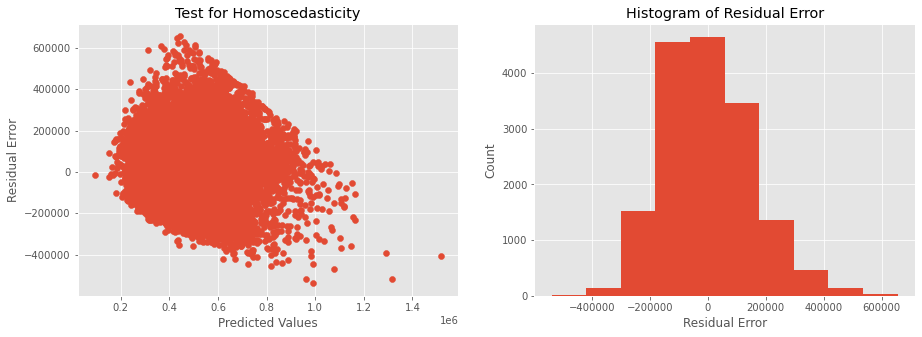

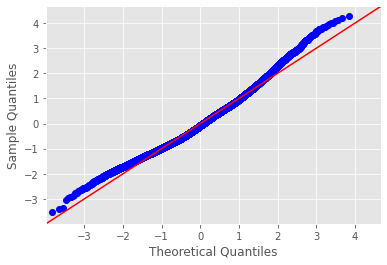

In [213]:
testplots(multi_model_3);

## Setting up Binary Column for Renovations

In [214]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'was_renovated',
       'sqft_basement2', 'age_at_sale', 'age_renovation_at_sale', 'dup_id'],
      dtype='object')

In [215]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,age_at_sale,age_renovation_at_sale,dup_id
2874,9542400025,9/16/2014,4,1.75,2620,11041,1.5,NO,NONE,Good,...,98005,47.5975,-122.174,2230,11041,False,0,52,52,False
16348,7852170130,4/21/2015,4,2.75,3260,5335,2.0,NO,NONE,Average,...,98065,47.5414,-121.864,3180,5438,False,0,12,12,False
10003,686400060,8/20/2014,4,2.25,1890,8034,1.0,NO,NONE,Good,...,98008,47.6338,-122.117,1920,7210,False,0,47,47,False
5635,9521100280,6/12/2014,3,2.50,1250,1103,3.0,NO,AVERAGE,Average,...,98103,47.6619,-122.352,1250,1188,False,0,9,9,False
10910,1431400070,2/5/2015,3,1.00,1060,7900,1.0,NO,NONE,Average,...,98058,47.4604,-122.180,1310,7900,True,0,54,14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11890,3622069114,9/9/2014,4,3.50,3420,33106,2.0,NO,NONE,Average,...,98010,47.3554,-121.986,3420,36590,False,0,10,10,False
12607,6163900971,6/19/2014,3,2.00,1430,6000,1.0,NO,NONE,Very Good,...,98155,47.7564,-122.316,1630,6315,False,0,69,69,False
5679,2207100255,5/15/2014,3,1.50,1120,7000,1.0,NO,NONE,Average,...,98007,47.5987,-122.146,1470,7950,False,0,59,59,False
903,2460700260,2/18/2015,3,2.00,1480,6698,1.0,NO,NONE,Good,...,98058,47.4614,-122.168,1850,7348,False,400,36,36,False


In [216]:
#take boolean column of 'was_renovated' and create dummy column
renovated_dummies_train = pd.get_dummies(X_train['was_renovated'], drop_first=True)
renovated_dummies_train

renovated_dummies_test = pd.get_dummies(X_test['was_renovated'], drop_first=True)
renovated_dummies_test

,True
21113,0
8256,0
14232,0
5846,0
18446,0
...,...
1776,0
17994,0
18708,0
4033,0


In [217]:
renovated_dummies_test.value_counts()

True
0       3968
1        120
dtype: int64

In [218]:
renovated_dummies_test.value_counts()

True
0       3968
1        120
dtype: int64

In [219]:
renovated_dummies_train.rename(columns={True: "Renovated Y/N"}, inplace = True)
renovated_dummies_train

,Renovated Y/N
2874,0
16348,0
10003,0
5635,0
10910,1
...,...
11890,0
12607,0
5679,0
903,0


In [220]:
df['was_renovated'].value_counts()

False    19814
True       625
Name: was_renovated, dtype: int64

In [221]:
renovated_dummies_test.rename(columns={True: "Renovated"}, inplace = True)
renovated_dummies_test

,Renovated
21113,0
8256,0
14232,0
5846,0
18446,0
...,...
1776,0
17994,0
18708,0
4033,0


In [222]:
X_train_renovated = pd.concat([X_train_dummies, renovated_dummies_train], axis=1)
X_train_renovated

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good,Renovated Y/N
2874,4,2620,11041,2230,52,0,1,0,0,0
16348,4,3260,5335,3180,12,0,0,0,0,0
10003,4,1890,8034,1920,47,0,1,0,0,0
5635,3,1250,1103,1250,9,0,0,0,0,0
10910,3,1060,7900,1310,54,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11890,4,3420,33106,3420,10,0,0,0,0,0
12607,3,1430,6000,1630,69,0,0,0,1,0
5679,3,1120,7000,1470,59,0,0,0,0,0
903,3,1480,6698,1850,36,0,1,0,0,0


In [223]:
X_test_renovated = pd.concat([X_test_dummies, renovated_dummies_test], axis=1)
X_test_renovated

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good,Renovated
21113,3,1410,2052,1410,1,0,0,0,0,0
8256,3,1440,8370,1440,37,0,0,0,0,0
14232,4,2090,4196,2640,8,0,0,0,0,0
5846,3,1950,3730,2080,19,0,0,0,0,0
18446,5,3500,10155,2940,18,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1776,4,3330,17533,3340,46,0,0,0,0,0
17994,3,1580,8775,1180,73,0,0,0,0,0
18708,3,1010,7520,1370,40,0,1,0,0,0
4033,3,2540,9520,1870,55,0,0,0,0,0


In [224]:
multi_model_4 = LinearRegression()
multi_model_4.fit(X_train_renovated,y_train)

LinearRegression()

In [225]:
print(f'multi_model_3 Train R2 {round(multi_model_3.score(X_train_dummies, y_train),4)}')
print(f'multi_model_3 Test R2 {round(multi_model_3.score(X_test_dummies, y_test),4)}')
print_model_score(multi_model_4, X_train_renovated, y_train, "multi_model_4")
print_model_score(multi_model_4, X_test_renovated, y_test, "multi_model_4")

AttributeError: 'OLSResults' object has no attribute 'score'

In [252]:
#OLS for multi_model_4
endog = y_train
exog = sm.add_constant(X_train_renovated)

multi_model_4 = sm.OLS(endog, exog).fit()
multi_model_4 = multi_model_4.summary()
multi_model_4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1413.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:49:52   Log-Likelihood:            -2.1838e+05
No. Observations:               16351   AIC:                         4.368e+05
Df Residuals:                   16340   BIC:                         4.369e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.37e+04   6287.025      3.770      0.000    1.14e+04     3.6e+04
bedrooms      -2.482e+04   1703.426    -14.568      0.000   -2.82e+04   -2.15e+04
sqft_living     148.5722      2.709     54.852      0.000     143.263     153.881
sqft_lot         -0.1169      0.031     -3.831      0.000      -0.177      -0.057
sqft_living15    93.4243      2.938     31.801      0.000      87.666      99.183
age_at_sale    1394.3317     49.591     28.117      0.000    1297.129    1491.535
Fair          -7.875e+04   1.35e+04     -5.839      0.000   -1.05e+05   -5.23e+04
Good          -1012.5656   2933.506     -0.345      0.730   -6762.557    4737.426
Poor          -1.682e+05    3.2e+04     -5.253      0.000   -2.31e+05   -1.05e+05
Very Good      4.248e+04   4843.232      8.771      0.000     3.3e+04     5.2e+04
Renovated Y/N   5.27e+04   7171.048      7.348      0.000    3.86e+04    6.68e+04
==============================================================================
Omnibus:                      657.163   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.610
Skew:                           0.492   Prob(JB):                    4.56e-163
Kurtosis:                       3.361   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
X_train_renovated

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good,Renovated Y/N
2874,4,2620,11041,2230,52,0,1,0,0,0
16348,4,3260,5335,3180,12,0,0,0,0,0
10003,4,1890,8034,1920,47,0,1,0,0,0
5635,3,1250,1103,1250,9,0,0,0,0,0
10910,3,1060,7900,1310,54,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11890,4,3420,33106,3420,10,0,0,0,0,0
12607,3,1430,6000,1630,69,0,0,0,1,0
5679,3,1120,7000,1470,59,0,0,0,0,0
903,3,1480,6698,1850,36,0,1,0,0,0


In [254]:
#Import standard scaler
#from sklearn.preprocessing import StandardScaler

#Scale our exogenous variables
ss = StandardScaler()
ss.fit(X_train_renovated)
X_scaled = ss.transform(X_train_renovated)

#Create dataframe with columns titles
X_scaled_df = pd.DataFrame(X_scaled, index=X_train_renovated.index, columns = X_train_renovated.columns)

X_scaled_df

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good,Renovated Y/N
2874,0.760317,0.833001,-0.087163,0.497730,0.288305,-0.090214,1.661499,-0.037532,-0.288331,-0.178520
16348,0.760317,1.658344,-0.230108,2.037326,-1.080594,-0.090214,-0.601866,-0.037532,-0.288331,-0.178520
10003,0.760317,-0.108405,-0.162493,-0.004664,0.117193,-0.090214,1.661499,-0.037532,-0.288331,-0.178520
5635,-0.370991,-0.933747,-0.336127,-1.090485,-1.183262,-0.090214,-0.601866,-0.037532,-0.288331,-0.178520
10910,-0.370991,-1.178770,-0.165850,-0.993247,0.356750,-0.090214,-0.601866,-0.037532,-0.288331,5.601626
...,...,...,...,...,...,...,...,...,...,...
11890,0.760317,1.864679,0.465603,2.426277,-1.149039,-0.090214,-0.601866,-0.037532,-0.288331,-0.178520
12607,-0.370991,-0.701619,-0.213448,-0.474646,0.870088,-0.090214,-0.601866,-0.037532,3.468240,-0.178520
5679,-0.370991,-1.101394,-0.188397,-0.733947,0.527863,-0.090214,-0.601866,-0.037532,-0.288331,-0.178520
903,-0.370991,-0.637139,-0.195962,-0.118108,-0.259255,-0.090214,1.661499,-0.037532,-0.288331,-0.178520


In [255]:
#Run multi-variable model
endog = y_train
exog = sm.add_constant(X_scaled_df)

multi_model_scaled = sm.OLS(endog, exog).fit()
multi_model_scaled_summary = multi_model_scaled.summary()
multi_model_scaled_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1413.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:49:52   Log-Likelihood:            -2.1838e+05
No. Observations:               16351   AIC:                         4.368e+05
Df Residuals:                   16340   BIC:                         4.369e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.769e+05   1195.234    398.965      0.000    4.75e+05    4.79e+05
bedrooms      -2.194e+04   1505.714    -14.568      0.000   -2.49e+04    -1.9e+04
sqft_living    1.152e+05   2100.337     54.852      0.000    1.11e+05    1.19e+05
sqft_lot      -4667.6804   1218.512     -3.831      0.000   -7056.096   -2279.265
sqft_living15  5.765e+04   1812.768     31.801      0.000    5.41e+04    6.12e+04
age_at_sale    4.074e+04   1449.066     28.117      0.000    3.79e+04    4.36e+04
Fair          -7047.2301   1206.935     -5.839      0.000   -9412.954   -4681.506
Good           -447.3717   1296.081     -0.345      0.730   -2987.833    2093.089
Poor          -6303.6712   1199.924     -5.253      0.000   -8655.653   -3951.689
Very Good      1.131e+04   1289.270      8.771      0.000    8781.177    1.38e+04
Renovated Y/N  9116.7253   1240.634      7.348      0.000    6684.946    1.15e+04
==============================================================================
Omnibus:                      657.163   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.610
Skew:                           0.492   Prob(JB):                    4.56e-163
Kurtosis:                       3.361   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
#interpreting coefficient of scaled sqft_living
X_train['sqft_living'].std()

775.4596017717635

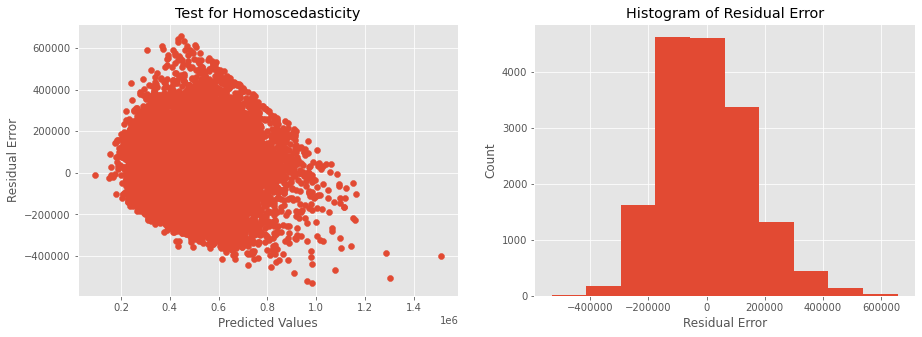

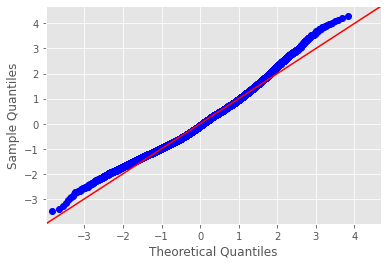

In [257]:
testplots(multi_model_scaled);

In [258]:
#ohe = OneHotEncoder(categories='auto', sparse=, handle_unknown='ignore')

In [259]:
#take boolean column of 'was_renovated' and create dummy column
zip_dummies_train = pd.get_dummies(X_train['zipcode'], drop_first=True)
zip_dummies_train

zip_dummies_test = pd.get_dummies(X_test['zipcode'], drop_first=True)
zip_dummies_test

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
21113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14232,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18446,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17994,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
df['zipcode'].value_counts()

98103    588
98038    586
98052    563
98115    558
98042    547
        ... 
98102     88
98109     86
98024     73
98148     57
98039      6
Name: zipcode, Length: 70, dtype: int64

In [261]:
X_train_zip = pd.concat([X_train_renovated, zip_dummies_train], axis=1)
X_train_zip

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good,Renovated Y/N,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
2874,4,2620,11041,2230,52,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16348,4,3260,5335,3180,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10003,4,1890,8034,1920,47,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5635,3,1250,1103,1250,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10910,3,1060,7900,1310,54,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11890,4,3420,33106,3420,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12607,3,1430,6000,1630,69,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5679,3,1120,7000,1470,59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,3,1480,6698,1850,36,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
X_test_zip = pd.concat([X_test_renovated, zip_dummies_test], axis=1)
X_test_zip

,bedrooms,sqft_living,sqft_lot,sqft_living15,age_at_sale,Fair,Good,Poor,Very Good,Renovated,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
21113,3,1410,2052,1410,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8256,3,1440,8370,1440,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14232,4,2090,4196,2640,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5846,3,1950,3730,2080,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18446,5,3500,10155,2940,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,4,3330,17533,3340,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17994,3,1580,8775,1180,73,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18708,3,1010,7520,1370,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4033,3,2540,9520,1870,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
multi_model_5 = LinearRegression()
multi_model_5.fit(X_train_zip,y_train)

LinearRegression()

In [264]:
multi_model_5.score(X_train_zip,y_train)

0.8009211830738047

In [265]:
multi_model_5.score(X_test_zip, y_test)

0.7948365612837962

In [266]:
endog = y_train
exog = sm.add_constant(X_train_zip)

multi_model_scaled = sm.OLS(endog, exog).fit()
multi_model_scaled_summary = multi_model_scaled.summary()
multi_model_scaled_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     828.6
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:49:53   Log-Likelihood:            -2.1028e+05
No. Observations:               16351   AIC:                         4.207e+05
Df Residuals:                   16271   BIC:                         4.213e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -7.35e+04   6625.776    -11.093      0.000   -8.65e+04   -6.05e+04
bedrooms      -9564.4030   1064.265     -8.987      0.000   -1.17e+04   -7478.327
sqft_living     129.4655      1.681     77.032      0.000     126.171     132.760
sqft_lot          0.3040      0.020     15.140      0.000       0.265       0.343
sqft_living15    70.9617      1.960     36.203      0.000      67.120      74.804
age_at_sale     -26.0744     34.459     -0.757      0.449     -93.618      41.470
Fair          -3.462e+04   8270.001     -4.186      0.000   -5.08e+04   -1.84e+04
Good           1.743e+04   1881.699      9.265      0.000    1.37e+04    2.11e+04
Poor          -1.275e+05   1.96e+04     -6.497      0.000   -1.66e+05   -8.91e+04
Very Good      4.817e+04   3018.486     15.958      0.000    4.23e+04    5.41e+04
Renovated Y/N  5.113e+04   4407.837     11.600      0.000    4.25e+04    5.98e+04
98002          3984.8385   9199.940      0.433      0.665    -1.4e+04     2.2e+04
98003          5230.1686   8224.091      0.636      0.525   -1.09e+04    2.14e+04
98004          5.116e+05   9917.036     51.592      0.000    4.92e+05    5.31e+05
98005          3.326e+05   1.01e+04     33.081      0.000    3.13e+05    3.52e+05
98006          2.884e+05   7641.206     37.736      0.000    2.73e+05    3.03e+05
98007          2.686e+05   1.04e+04     25.762      0.000    2.48e+05    2.89e+05
98008           2.55e+05   8393.923     30.377      0.000    2.39e+05    2.71e+05
98010          8.371e+04   1.18e+04      7.107      0.000    6.06e+04    1.07e+05
98011          1.372e+05   9160.850     14.981      0.000    1.19e+05    1.55e+05
98014          1.071e+05   1.06e+04     10.086      0.000    8.63e+04    1.28e+05
98019          8.462e+04   9376.701      9.025      0.000    6.62e+04    1.03e+05
98022          1.825e+04   8840.083      2.064      0.039     920.552    3.56e+04
98023         -1.545e+04   7174.055     -2.154      0.031   -2.95e+04   -1389.039
98024          1.419e+05   1.34e+04     10.609      0.000    1.16e+05    1.68e+05
98027          1.838e+05   7532.814     24.399      0.000    1.69e+05    1.99e+05
98028          1.298e+05   8170.164     15.886      0.000    1.14e+05    1.46e+05
98029          2.489e+05   8006.822     31.085      0.000    2.33e+05    2.65e+05
98030          4562.3031   8629.032      0.529      0.597   -1.24e+04    2.15e+04
98031          1.154e+04   8401.899      1.374      0.170   -4928.467     2.8e+04
98032          -754.4254   1.08e+04     -0.070      0.944    -2.2e+04    2.05e+04
98033           3.35e+05   7702.034     43.490      0.000     3.2e+05     3.5e+05
98034          1.922e+05   7055.337     27.242      0.000    1.78e+05    2.06e+05
98038          3.293e+04   6972.448      4.723      0.000    1.93e+04    4.66e+04
98039           6.33e+05   4.21e+04     15.033   

In [267]:
endog = y_train
exog = sm.add_constant(X_scaled_df)

multi_model_scaled = sm.OLS(endog, exog).fit()
multi_model_scaled_summary = multi_model_scaled.summary()
multi_model_scaled_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1413.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:49:53   Log-Likelihood:            -2.1838e+05
No. Observations:               16351   AIC:                         4.368e+05
Df Residuals:                   16340   BIC:                         4.369e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.769e+05   1195.234    398.965      0.000    4.75e+05    4.79e+05
bedrooms      -2.194e+04   1505.714    -14.568      0.000   -2.49e+04    -1.9e+04
sqft_living    1.152e+05   2100.337     54.852      0.000    1.11e+05    1.19e+05
sqft_lot      -4667.6804   1218.512     -3.831      0.000   -7056.096   -2279.265
sqft_living15  5.765e+04   1812.768     31.801      0.000    5.41e+04    6.12e+04
age_at_sale    4.074e+04   1449.066     28.117      0.000    3.79e+04    4.36e+04
Fair          -7047.2301   1206.935     -5.839      0.000   -9412.954   -4681.506
Good           -447.3717   1296.081     -0.345      0.730   -2987.833    2093.089
Poor          -6303.6712   1199.924     -5.253      0.000   -8655.653   -3951.689
Very Good      1.131e+04   1289.270      8.771      0.000    8781.177    1.38e+04
Renovated Y/N  9116.7253   1240.634      7.348      0.000    6684.946    1.15e+04
==============================================================================
Omnibus:                      657.163   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.610
Skew:                           0.492   Prob(JB):                    4.56e-163
Kurtosis:                       3.361   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualizations

In [268]:
endog = y_train
exog = sm.add_constant(X_train_zip)

multi_model_5_OLS = sm.OLS(endog, exog).fit()

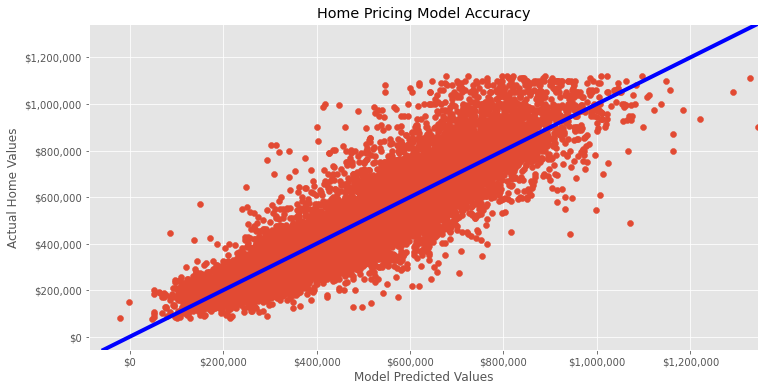

In [269]:
#Chart of our model accuracy
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x=multi_model_5_OLS.fittedvalues,y=y_train)
ax.axline((0, 0), (1, 1), linewidth=4, color='b')
ax.ticklabel_format(style='plain')
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_ybound(upper=max(multi_model_5_OLS.fittedvalues))
ax.set_xbound(upper=max(multi_model_5_OLS.fittedvalues))
ax.set_title("Home Pricing Model Accuracy")
ax.set_xlabel("Model Predicted Values")
ax.set_ylabel("Actual Home Values");
#Save figure
plt.savefig('Visualizations/Home_Pricing_Model_Accuracy.png', bbox_inches='tight')
#ax.set_xbound;

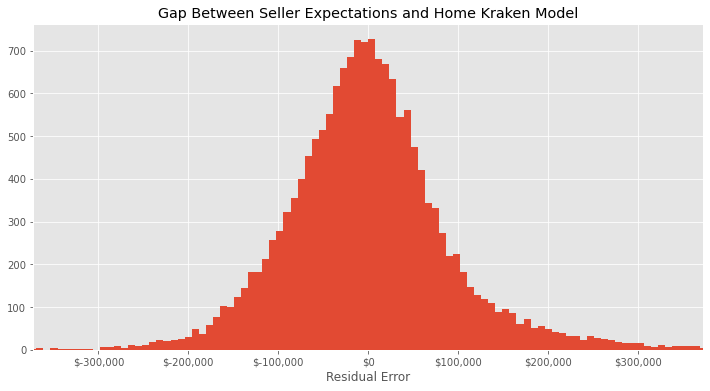

In [270]:
#Chart the residuals from our model 
#Create residual series
resid_multi_model_5_OLS = multi_model_5_OLS.resid
#Create chart
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(resid_multi_model_5_OLS,bins="auto")
ax.set_xlabel("Residual Error")
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.set_title(label="Gap Between Seller Expectations and Home Kraken Model")
ax.set_xbound(lower=(resid_multi_model_5_OLS.std()*-4),upper=resid_multi_model_5_OLS.std()*4)
plt.savefig('Visualizations/Histogram_of_Residual_Error.png', bbox_inches='tight')

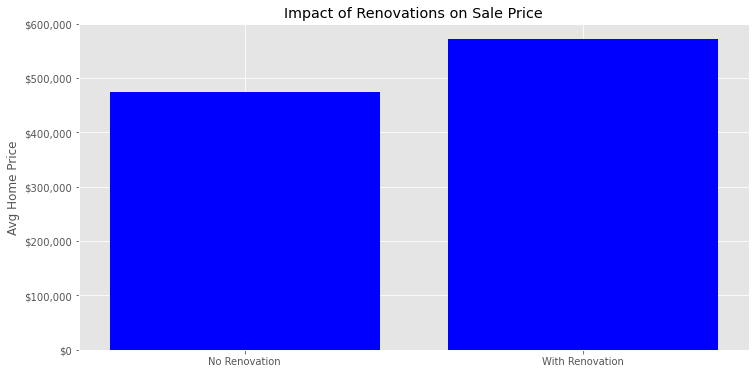

In [271]:
#create a dictionary of for mean price values of each category of renovation; with and without
was_renovated_mean_price_dict = df.groupby(["was_renovated"]).mean()['price'].to_dict()
#Plot mean price values for each category
x = was_renovated_mean_price_dict.keys()
y = was_renovated_mean_price_dict.values()
tick_label = ['False', 'True']
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_title("")
ax.bar(x,y,tick_label=["No Renovation","With Renovation"],color="b")
ax.set_title("Impact of Renovations on Sale Price")
ax.set_ylabel("Avg Home Price")
plt.savefig('Visualizations/Impact_of_renovations_on_sale_price', bbox_inches='tight');

In [272]:
#Explore mean price by condition
unsorted_condition_mean_price_dict = df.groupby(["condition"]).mean()['price'].sort_values().to_dict()
unsorted_condition_mean_price_dict

{'Poor': 299676.78571428574,
 'Fair': 309704.6964285714,
 'Good': 465163.94367497694,
 'Average': 479123.92704250827,
 'Very Good': 517323.5512820513}

In [273]:
#Put our dictionary into intuitive order based on condition
sorted_condition_mean_price_dict = {"Poor":0,"Fair":0,"Average":0,"Good":0,"Very Good":0}
for condition in sorted_condition_mean_price_dict:
    sorted_condition_mean_price_dict[condition] = unsorted_condition_mean_price_dict[condition]

sorted_condition_mean_price_dict

{'Poor': 299676.78571428574,
 'Fair': 309704.6964285714,
 'Average': 479123.92704250827,
 'Good': 465163.94367497694,
 'Very Good': 517323.5512820513}

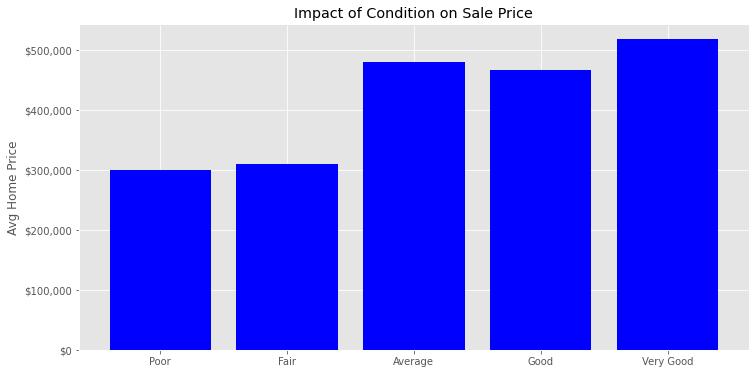

In [276]:
#Plot mean price values of each home condition
x = sorted_condition_mean_price_dict.keys()
y = sorted_condition_mean_price_dict.values()
#tick_label = [x]
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_title("")
ax.bar(x,y,color="b")
ax.set_title("Impact of Condition on Sale Price")
ax.set_ylabel("Avg Home Price")

plt.savefig('Visualizations/Impact_of_condition_on_sale_price', bbox_inches='tight');